##### Create a Decision Tree that can predict the survival of passengers on the Titanic. Make sure not to impose any restrictions on the depth of the tree.
- Load the titanic.csv dataset into a Jupyter notebook. This dataset comes  from here.
- Select relevant variables from the data and split the data into a training, development, and test set.
- Train a decision tree and make a plot of it.
-  Compute your model’s accuracy on the development set.

###### above is done


- For tree pruning in Sklearn we usually use the maxdepth parameter, a
parameter which determines how many levels the tree can have. Try
building your model with different values of the max_depth [2-10]. At each
step, create a plot of your tree and store the accuracies on both the training
and development data.
- Plot a line of your training accuracies and another of your development
accuracies in the same graph. Write down what shape the lines have and
what this shape means.
- Pick an optimum value for the max_depth parameter and train your final
decision tree using this parameter
- Report the accuracy of your final model on the test data.

In [38]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

print("Hey, that worked!")

Hey, that worked!


In [39]:
# importing the dataset
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'female' else 1)
data.dropna(subset=['Age'], inplace=True)
X = data.iloc[:,[2,4,5,9]].values
y = data.iloc[:,1].values

r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)

In [45]:
missing_values_count = data.isnull().sum()



missing_values_count[0:11]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
dtype: int64

In [50]:
column_names = data.columns
column_positions = [2,4,5,9]
columns_to_use = [column_names[pos] for pos in column_positions]
columns_to_use

['Pclass', 'Sex', 'Age', 'Fare']

In [46]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.659217877094972
At depth: 23


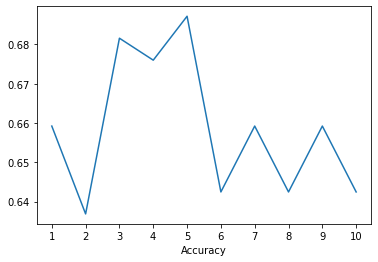

In [47]:
# looking at effect of pruning   
pruned_depths = range(1,11)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [48]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 5


DecisionTreeClassifier(max_depth=5)

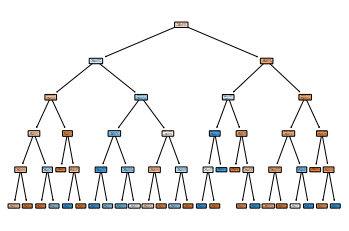

In [56]:
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(pruned,feature_names = columns_to_use, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('pruned_tree.png', dpi=800)
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz



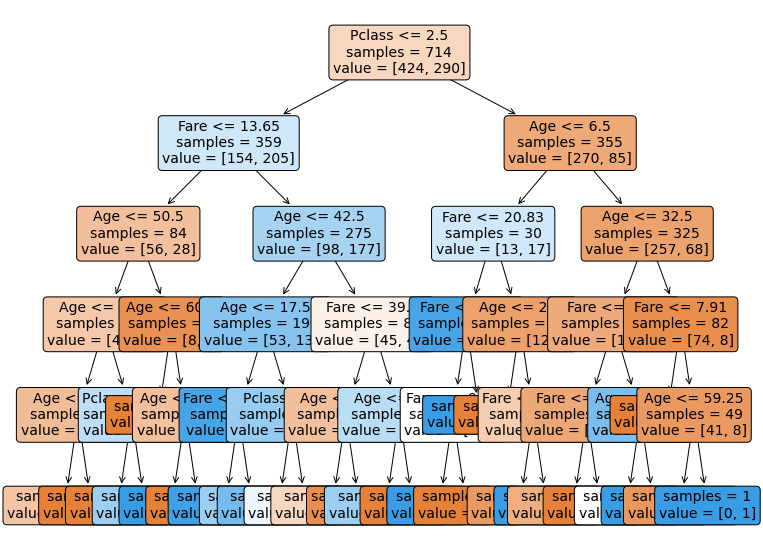

In [64]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(12, 10))  # Adjust the figsize according to your desired size

# Set font size
font_size = 14  # Adjust the font size according to your preference

# Set impurity to False to remove impurity information from nodes
tree.plot_tree(pruned, feature_names=columns_to_use,
               rounded=True, proportion=False, precision=2, filled=True,
               fontsize=font_size, ax=ax, impurity=False)  # display tree

plt.show()
